# Dataset :- Global Terrorism Database 1970-2017

All Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
%matplotlib inline
import time
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.p

Importing Dataset

In [2]:
df = pd.read_excel("/home/user/Downloads/gtd/global.xlsx")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 135)

Counting null values in each column

In [4]:
print(df.isnull().sum())

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

EDA using Pandas Profiling

In [5]:
pandas_profiling.ProfileReport(df)

Number of variables,135
Number of observations,181691
Total Missing (%),51.4%
Total size in memory,187.1 MiB
Average record size in memory,1.1 KiB
Numeric,60
Categorical,57
Boolean,7
Date,1
Text (Unique),0
Rejected,10



Dropping Missing values in rows and columns

In [6]:
# Dropping rows with more than 75% missing values
row = df.isnull().sum(axis=1)
junk_25 = int(df.shape[1] * 0.75)
row = row[row > junk_25]
index_to_delete = row.index.tolist()
df = df.drop(index_to_delete, axis=0)



# Finding columns with more than 25% missing
null_count_dict = df.isnull().sum().to_dict()
forty_percent = int(df.shape[0] * .25)
column_to_delete = []
for key, value in null_count_dict.items():
    if (value > forty_percent):
        column_to_delete.append(key)

# delete the column in column 40% missing
df = df.drop(column_to_delete, axis=1)

print(df.shape)



#Dump csv 
df.to_csv("/home/user/Downloads/gtd/new.csv",index=False)


(181691, 48)


Loading csv after deleting missing values

In [19]:
df = pd.read_csv("/home/user/Downloads/gtd/new.csv")
y = df['gname']
X = df.drop(['gname'], axis=1)
print(type(y))

<class 'pandas.core.series.Series'>


In [20]:
y.value_counts()

Unknown                                                                        82782
Taliban                                                                         7478
Islamic State of Iraq and the Levant (ISIL)                                     5613
Shining Path (SL)                                                               4555
Farabundo Marti National Liberation Front (FMLN)                                3351
Al-Shabaab                                                                      3288
New People's Army (NPA)                                                         2772
Irish Republican Army (IRA)                                                     2671
Revolutionary Armed Forces of Colombia (FARC)                                   2487
Boko Haram                                                                      2418
Kurdistan Workers' Party (PKK)                                                  2310
Basque Fatherland and Freedom (ETA)                              

Dealing with class Imbalance

In [21]:
class_count = df['gname'].value_counts()
keep_class = []
for i, v in class_count.items():
    if (v > 500):
        keep_class.append(i)
frame = pd.DataFrame(columns=df.columns)
for i in keep_class:
    frame = frame.append(df[df.gname == i])

y = frame['gname']
X = frame.drop(['gname'], axis=1)

Still having missing values so treating them by mean and mode

In [22]:
for i in X.columns:
    if X[i].dtype == object:
        X[i] = X[i].fillna(X[i].mode()[0])

    else:
        X[i] = X[i].fillna(X[i].mean())



Encoding the categorical variable

In [23]:
label = []
for i in X.columns:
    if X[i].dtype == object:
        l = LabelEncoder()
        X[i] = l.fit_transform(X[i])
        label.append(l)

Boxplot for contamination estimation

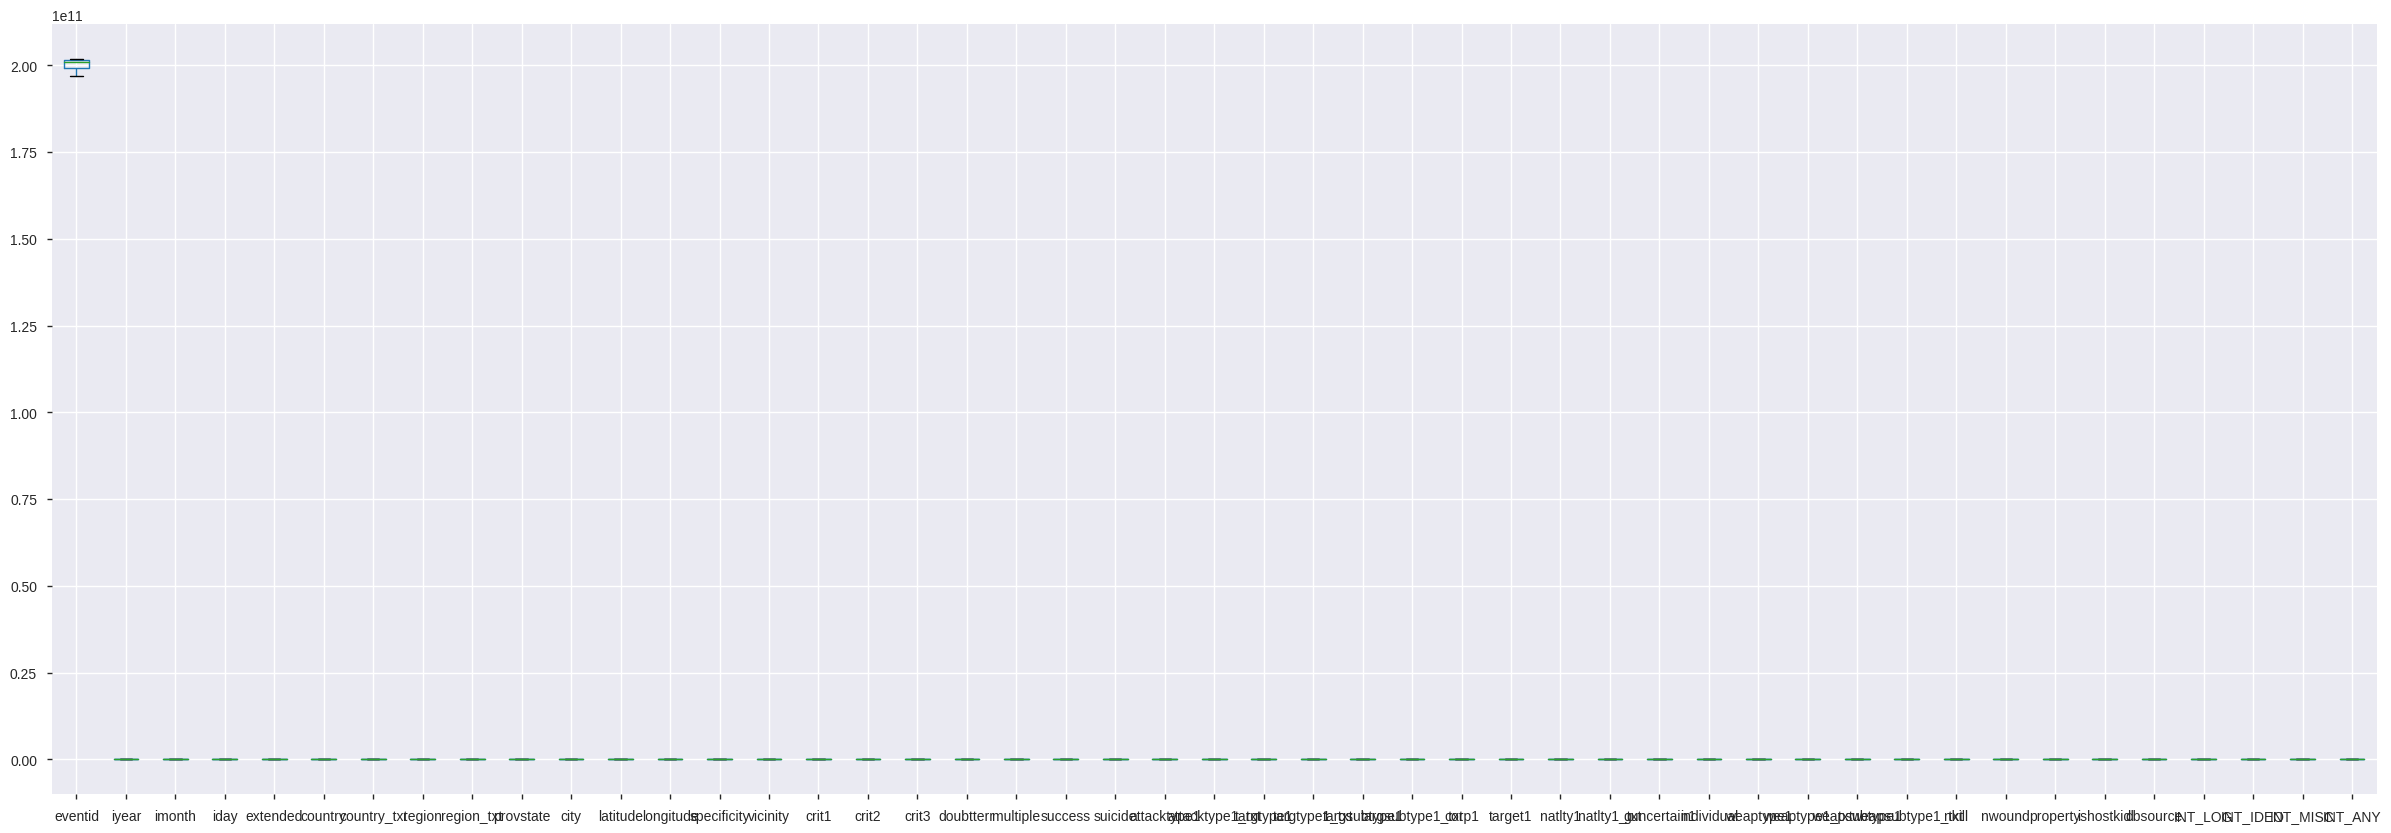

In [24]:
X.boxplot(figsize=(30,10))

outlier detection and removal

In [25]:
def detect_n_treat_outliers(data_frame, y,space, treat=True):
    print("==================================================")
    print("Outlier detection and treatment started ...")
    print("Space:", space)
    #     print("Label column name:", data_frame.columns[-1])
    # y = data_frame[data_frame.columns[-1]]
    # data_frame.drop([data_frame.columns[-1]], axis=1, inplace=True)
    X = data_frame

    dtypesss = X.dtypes

    #     print("Dtypes:;;", dtypesss)

    y_predicted = None
    params = space['params']

    if space['model'] == "DBSCAN":

        db = DBSCAN(**params)
        y_predicted = db.fit_predict(X)
        y_predicted = list(map(lambda x: 1 if x < 0 else 0, y_predicted))

    elif space['model'] == "EllipticEnvelope":
        elliptic = EllipticEnvelope(**params)
        for i in range(0, X.shape[0], 10000):
            elliptic.fit(X[i:10000 + i], y[i:10000 + i])
        y_predicted = elliptic.predict(X)
        y_predicted = list(map(lambda x: 1 if x == -1 else 0, y_predicted))

    elif space['model'] == "IsolationForest":
        iso = IsolationForest(**params)
        for i in range(0, X.shape[0], 10000):
            iso.fit(X[i:10000 + i], y[i:10000 + i])
        y_predicted = iso.predict(X)

        y_predicted = list(map(lambda x: 1 if x == -1 else 0, y_predicted))

    elif space['model'] == "OneClassSVM":
        ocv = OneClassSVM(**params)
        for i in range(0, X.shape[0], 10000):
            ocv.fit(X[i:10000 + i], y[i:10000 + i])
        y_predicted = ocv.predict(X)
        y_predicted = list(map(lambda x: 1 if x == -1 else 0, y_predicted))

    elif space['model'] == "LocalOutlierFactor":
        lof = LocalOutlierFactor(**params)
        for i in range(0, X.shape[0], 10000):
            lof.fit(X[i:10000 + i], y[i:10000 + i])
        y_predicted = lof._predict(X)
        y_predicted = list(map(lambda x: 1 if x == -1 else 0, y_predicted))

    elif space['model'] == "zscore":
        threshold = params['threshold']
        print("thold", threshold)
        score_frame = pd.DataFrame()
        for i in X.columns:
            score = zscore(X[i], axis=0, ddof=1)
            score_frame[i] = score
        score_frame = score_frame.abs()
        predicted_outliers = []
        for i in range(len(score_frame)):
            if any(score_frame.iloc[i] > threshold):
                predicted_outliers.append(1)
            else:
                predicted_outliers.append(0)
        y_predicted = predicted_outliers

    return y_predicted


def auto_detect_n_treat_outliers(df,y,hyperopt_trained_space, voting_percentage, treat=True):
    # Voting starts
    all_votes = [0] * df.shape[0]
    all_votes = np.array(all_votes)

    # iterating over each space and getting y_predicted
    for i in hyperopt_trained_space:
        y_predicted = detect_n_treat_outliers(df.copy(), y,i, treat=treat)
        y_predicted = np.array(y_predicted)
        all_votes += y_predicted

    voting_criteria = voting_percentage * (len(hyperopt_trained_space) ) * 1.0
    remove_rows = []
    for i in range(len(all_votes)):
        if all_votes[i] >= voting_criteria:
            remove_rows.append(i)

    final_remove_index = sorted(np.unique(remove_rows))
    return final_remove_index
hyperspace = [
             {"model": "IsolationForest", "params": {"n_estimators": 100,"contamination":0.05,"n_jobs": -1}},
             {"model": "LocalOutlierFactor", "params": {'n_neighbors': 50,"contamination":0.05}},
             {"model": "DBSCAN", "params": {'eps': 0.7}},
             {"model": "OneClassSVM", "params": {'max_iter': 10}},
             {"model": "EllipticEnvelope", "params": {'contamination':0.05}},
             {"model": "zscore", "params": {'threshold':3 }}
            ]

final_remove_index = auto_detect_n_treat_outliers(X,y,hyperopt_trained_space=hyperspace,voting_percentage=0.83)
X.drop(X.index[final_remove_index], axis=0, inplace=True)
y.drop(y.index[final_remove_index], axis=0, inplace=True)

Outlier detection and treatment started ...
Space: {'model': 'IsolationForest', 'params': {'n_estimators': 100, 'contamination': 0.05, 'n_jobs': -1}}
Outlier detection and treatment started ...
Space: {'model': 'LocalOutlierFactor', 'params': {'n_neighbors': 50, 'contamination': 0.05}}
Outlier detection and treatment started ...
Space: {'model': 'DBSCAN', 'params': {'eps': 0.7}}
Outlier detection and treatment started ...
Space: {'model': 'OneClassSVM', 'params': {'max_iter': 10}}
Outlier detection and treatment started ...
Space: {'model': 'EllipticEnvelope', 'params': {'contamination': 0.05}}
Outlier detection and treatment started ...
Space: {'model': 'zscore', 'params': {'threshold': 3}}
thold 3


Feature selection based on scores

In [26]:
# Feature selection
f = f_classif(X, y)

class_f = dict(zip(X.columns, f[0]))
sorted_idx_class_f = sorted(class_f, key=(lambda key: class_f[key]), reverse=True)

#Taking top 25 features contributing
j = 25
X = X[sorted_idx_class_f[0:j]]

Feature scaling

In [27]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Splitting Dataset into train and test sets


In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Model fitting in batches for memory optimization

In [29]:
clf = RandomForestClassifier()
for i in range(0, X_train.shape[0], 10000):
    clf.fit(X_train[i:10000 + i], y_train[i:10000 + i])
    print(i)
predicted = clf.predict(X_test)    

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


Model Evalueation

In [30]:
def model_evalueation(y_test, y_pred):
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    f1score = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    cf = confusion_matrix(y_true=y_test, y_pred=y_pred)
    return {"accuracy": accuracy, "f1_score": f1score, "confusion_matrix":cf}
score = model_evalueation(y_test,predicted)
print(score)

{'accuracy': 0.9675967045419742, 'f1_score': 0.8783505160943541, 'confusion_matrix': array([[  121,     0,     0, ...,     0,     0,     0],
       [    0,    92,     0, ...,     0,     0,     0],
       [    0,     0,   171, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,   335,     0,     0],
       [    0,     0,     0, ...,     0,    43,     0],
       [    0,     0,     0, ...,     0,     0, 19120]])}


Loss optimization using hyperopt

In [ ]:
space = hp.choice("algo", [

    {"model": "RandomForestClassifier",
     "params": {
         "min_samples_split": hp.choice("min_samples_split", range(2, 10, 1)),
         "min_samples_leaf": hp.choice("min_samples_leaf", range(1, 5, 1)),
         "n_jobs": hp.choice("n_jobs", [-1]),

     }},

])


def optimization(space):
    params = space['params']
    model = space['model']
    print(params)
    clf = RandomForestClassifier(**params)

    for i in range(0, X_train.shape[0], 10000):
        clf.fit(X_train[i:10000 + i], y_train[i:10000 + i])

    predicted = clf.predict(X_test)
    f1 = f1_score(y_test, predicted, average='macro')
    print(f1)
    loss = (1 - f1)
    # print(loss)

    print("==============================================================")
    return loss


trials = Trials()

best = fmin(optimization, space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=False)
min_loss = min(trials.losses())
print(best)
print('Minimum loss:', min_loss)